In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [2]:
# Load data
data = pd.read_csv('/content/BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)

In [3]:
# Display first few rows
print(data.head())

        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [4]:
# Check for missing values
print(data.isnull().sum())

Date     0
Price    0
dtype: int64


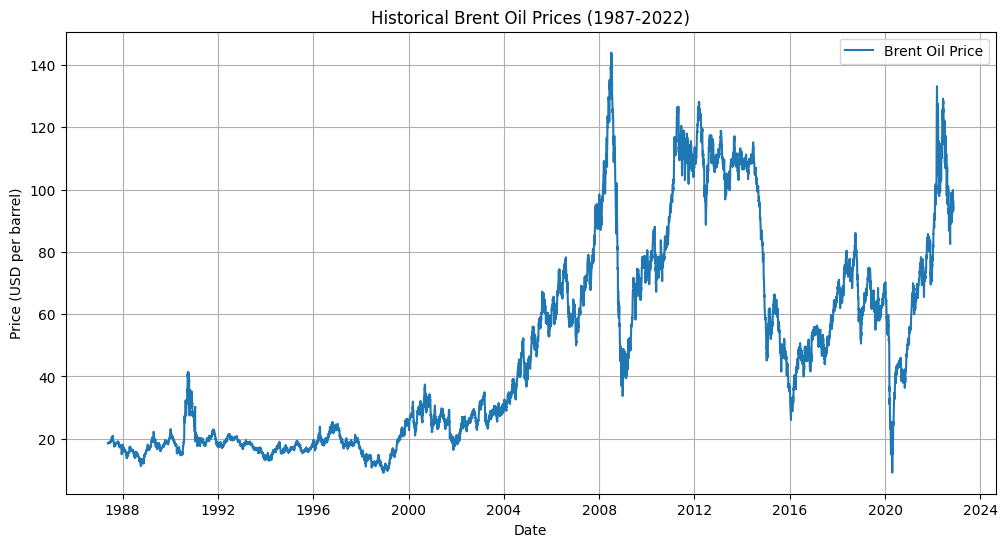

In [5]:
# Plot historical prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price')
plt.title('Historical Brent Oil Prices (1987-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid()
plt.show()

# Change Point Analysis

In [13]:
# Import libraries
from ruptures.detection import Pelt
import ruptures as rpt

In [14]:
# Convert prices to numpy array
prices = data['Price'].values

In [15]:
# Detect change points
algo = rpt.Pelt(model="rbf").fit(prices)
change_points = algo.predict(pen=10)  # Adjust penalty parameter as needed

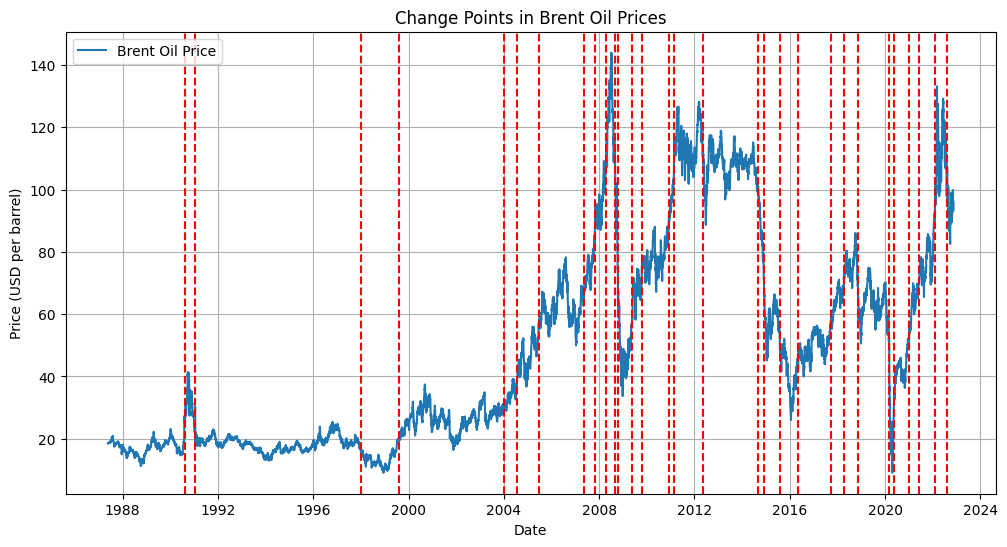

In [22]:
# Plot change points
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], prices, label='Brent Oil Price')
for cp in change_points[:-1]:  # Exclude the last change point
    plt.axvline(x=data['Date'].iloc[cp], color='r', linestyle='--')
plt.title('Change Points in Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid()
plt.show()

# Time Series Modeling

In [24]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 36.2 MB/s eta 0:00:00


In [25]:
# Import libraries
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

In [26]:
# Fit ARIMA model
model_arima = ARIMA(data['Price'], order=(5, 1, 0))  # Adjust order as needed
results_arima = model_arima.fit()
print(results_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14540.613
Date:                Thu, 20 Feb 2025   AIC                          29093.226
Time:                        13:40:06   BIC                          29135.862
Sample:                             0   HQIC                         29107.733
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.344      0.000       0.014       0.038
ar.L2         -0.0235      0.006     -4.231      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.507      0.1

In [27]:
# Fit GARCH model
model_garch = arch_model(data['Price'], vol='Garch', p=1, q=1)  # Adjust p and q as needed
results_garch = model_garch.fit()
print(results_garch.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3874927804.158277
Iteration:      2,   Func. Count:     12,   Neg. LLF: 70148.68734205695
Iteration:      3,   Func. Count:     19,   Neg. LLF: 924509187.1107914
Iteration:      4,   Func. Count:     27,   Neg. LLF: 44099.26204018903
Iteration:      5,   Func. Count:     33,   Neg. LLF: 41882.581755042986
Iteration:      6,   Func. Count:     39,   Neg. LLF: 41190.23335963133
Iteration:      7,   Func. Count:     46,   Neg. LLF: 40221.97253756566
Iteration:      8,   Func. Count:     52,   Neg. LLF: 38675.84139852016
Iteration:      9,   Func. Count:     58,   Neg. LLF: 46507.19984815386
Iteration:     10,   Func. Count:     64,   Neg. LLF: 52311.49939565074
Iteration:     11,   Func. Count:     73,   Neg. LLF: 39566.28900289833
Iteration:     12,   Func. Count:     79,   Neg. LLF: 37683.04414723057
Iteration:     13,   Func. Count:     85,   Neg. LLF: 38550.85348090723
Iteration:     14,   Func. Count:     91,   Neg. LLF: 48052.343

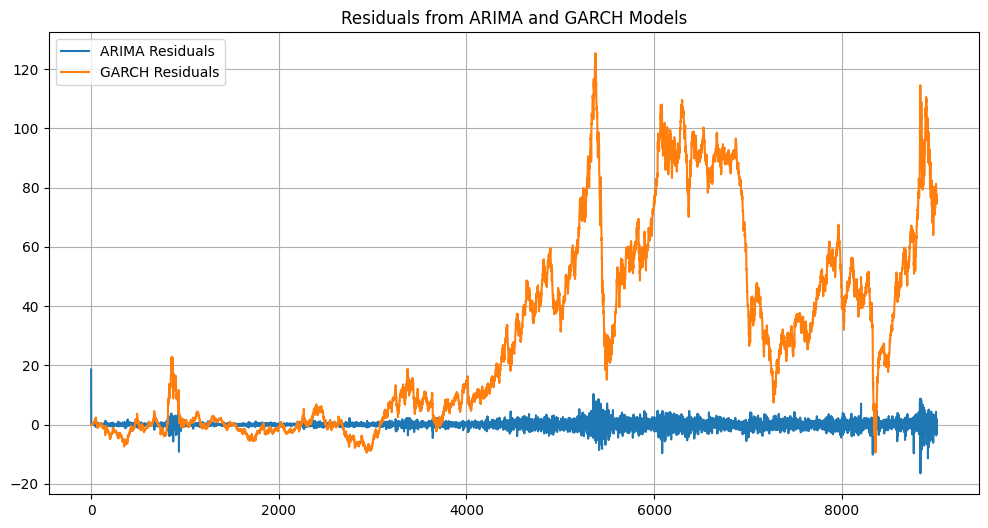

In [28]:
# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(results_arima.resid, label='ARIMA Residuals')
plt.plot(results_garch.resid, label='GARCH Residuals')
plt.title('Residuals from ARIMA and GARCH Models')
plt.legend()
plt.grid()
plt.show()